In [1]:
import healpy as h
from modules import analytic_sed as ased
from modules import ana_moment_fit as anamom
from modules import gram_schmidt_v0 as gsmom
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [103]:
# Setting analysis resolution
nside_moments=128 ; nside_freq=4
freq=[100,143,217,353,545,857]

do_field=True ; do_halo=True

In [53]:
data_path="../data/marcelo_planck_freq_sims/"
data=np.zeros((np.size(freq),h.nside2npix(nside_moments)),np.float64)
for i,f in enumerate(freq):
    if do_field and do_halo: 
        filename=data_path + "fullsky_cib-2lpt_" + str(int(f)).zfill(4) + "GHz.fits"
        print filename
        field=h.read_map(filename,verbose=False)
        filename=data_path + "fullsky_cib-halo_" + str(int(f)).zfill(4) + "GHz.fits"
        print filename
        halo=h.read_map(filename,verbose=False)
        temp_data=field+halo
    elif do_field:
        filename=data_path + "fullsky_cib-2lpt_" + str(int(f)).zfill(4) + "GHz.fits"
        print filename
        temp_data=h.read_map(filename,verbose=False)
    elif do_halo:
        filename=data_path + "fullsky_cib-halo_" + str(int(f)).zfill(4) + "GHz.fits"
        print filename
        temp_data=h.read_map(filename,verbose=False)
    if nside_moments<h.get_nside(temp_data):
        data[i,:]=h.ud_grade(temp_data,nside_moments)[:]

../data/marcelo_planck_freq_sims/fullsky_cib-2lpt_0100GHz.fits
../data/marcelo_planck_freq_sims/fullsky_cib-halo_0100GHz.fits
../data/marcelo_planck_freq_sims/fullsky_cib-2lpt_0143GHz.fits
../data/marcelo_planck_freq_sims/fullsky_cib-halo_0143GHz.fits
../data/marcelo_planck_freq_sims/fullsky_cib-2lpt_0217GHz.fits
../data/marcelo_planck_freq_sims/fullsky_cib-halo_0217GHz.fits
../data/marcelo_planck_freq_sims/fullsky_cib-2lpt_0353GHz.fits
../data/marcelo_planck_freq_sims/fullsky_cib-halo_0353GHz.fits
../data/marcelo_planck_freq_sims/fullsky_cib-2lpt_0545GHz.fits
../data/marcelo_planck_freq_sims/fullsky_cib-halo_0545GHz.fits
../data/marcelo_planck_freq_sims/fullsky_cib-2lpt_0857GHz.fits
../data/marcelo_planck_freq_sims/fullsky_cib-halo_0857GHz.fits


In [102]:
# Setting number of pixels
num_moment_pix=h.nside2npix(nside_moments) 
if nside_freq==0:
    num_freq_pix=1
else:
    num_freq_pix=h.nside2npix(nside_freq)
    

nu=np.array(freq).astype("float")

figpath="./figures/moment_analysis_marcelo_sim"+"_Mnside" + str(nside_moments) + "_Fnside" + str(nside_freq) + "/"
!mkdir $figpath
if do_field and do_halo:
    figpath=figpath + "field_halo/"
    !mkdir $figpath
elif do_field:
    figpath=figpath + "field/"
    !mkdir $figpath
elif do_halo:
    figpath=figpath + "halo/"
    !mkdir $figpath

mkdir: ./figures/moment_analysis_marcelo_sim_Mnside128_Fnside4/: File exists
mkdir: ./figures/moment_analysis_marcelo_sim_Mnside128_Fnside4/field_halo/: File exists


In [120]:
T_fit=np.zeros(num_freq_pix,np.float64)
slope_fit=np.zeros(num_freq_pix,np.float64)
local_monopole=np.zeros((np.size(freq),num_freq_pix),np.float64)
if num_freq_pix==1:
    for i in range(np.size(freq)):
        local_monopole[i,:]=np.mean(data[i,])
else:
    for i in range(np.size(freq)):
        local_monopole[i,:]=h.ud_grade(data[i,],nside_freq)

# The cell below is the most time consuming, depending on nside_freq

In [121]:
mom_fit=anamom.moment_fit(2)
for i in range(num_freq_pix):
    fit_par=mom_fit.fit_monopole_sed(freq,local_monopole[:,i],der_order=0,bounds_true=True,flat_sensitivity=False)
    #fit_par=mom_fit.fit_monopole_sed(freq,local_monopole[:,i],der_order=2,bounds_true=True,flat_sensitivity=False)
    #print i
    T_fit[i]=fit_par[1]
    slope_fit[i]=fit_par[2]

Bounds not provided or they lower and upper bound arrays are of unequal size
Setting the default bounds
Bounds not provided or they lower and upper bound arrays are of unequal size
Setting the default bounds
Bounds not provided or they lower and upper bound arrays are of unequal size
Setting the default bounds
Bounds not provided or they lower and upper bound arrays are of unequal size
Setting the default bounds
Bounds not provided or they lower and upper bound arrays are of unequal size
Setting the default bounds
Bounds not provided or they lower and upper bound arrays are of unequal size
Setting the default bounds
Bounds not provided or they lower and upper bound arrays are of unequal size
Setting the default bounds
Bounds not provided or they lower and upper bound arrays are of unequal size
Setting the default bounds
Bounds not provided or they lower and upper bound arrays are of unequal size
Setting the default bounds
Bounds not provided or they lower and upper bound arrays are of 

<IPython.core.display.Javascript object>


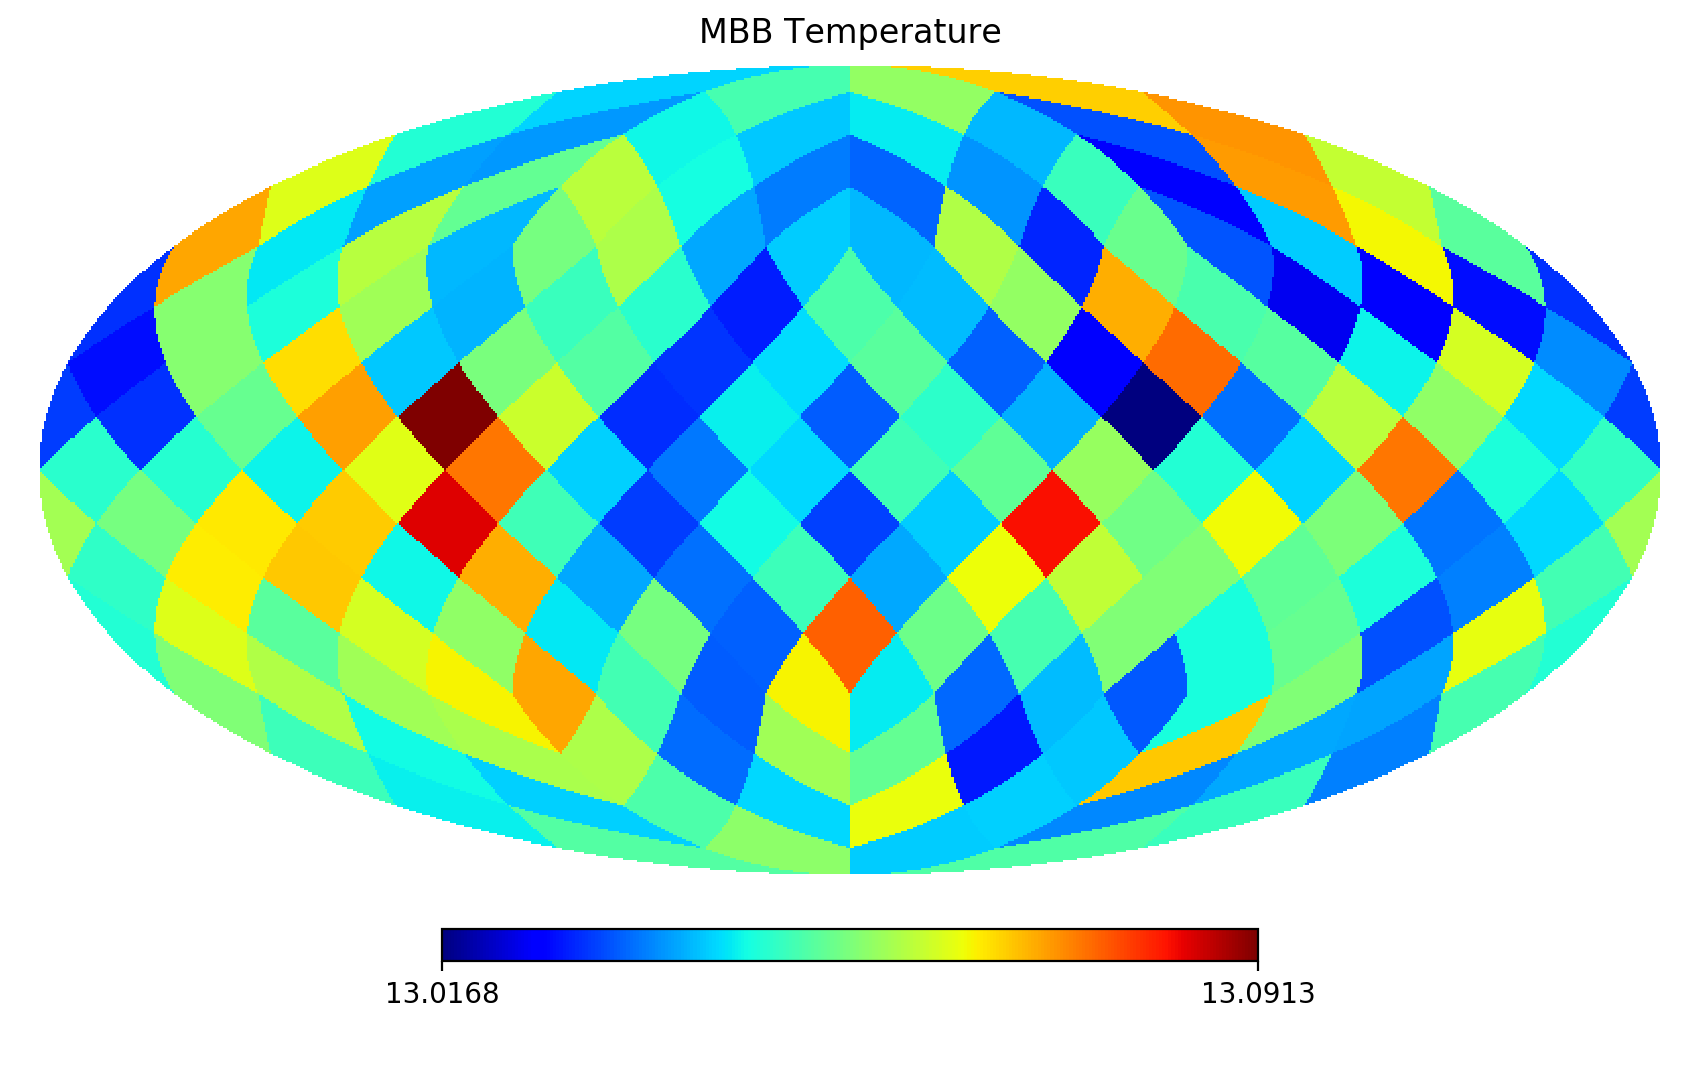

<IPython.core.display.Javascript object>


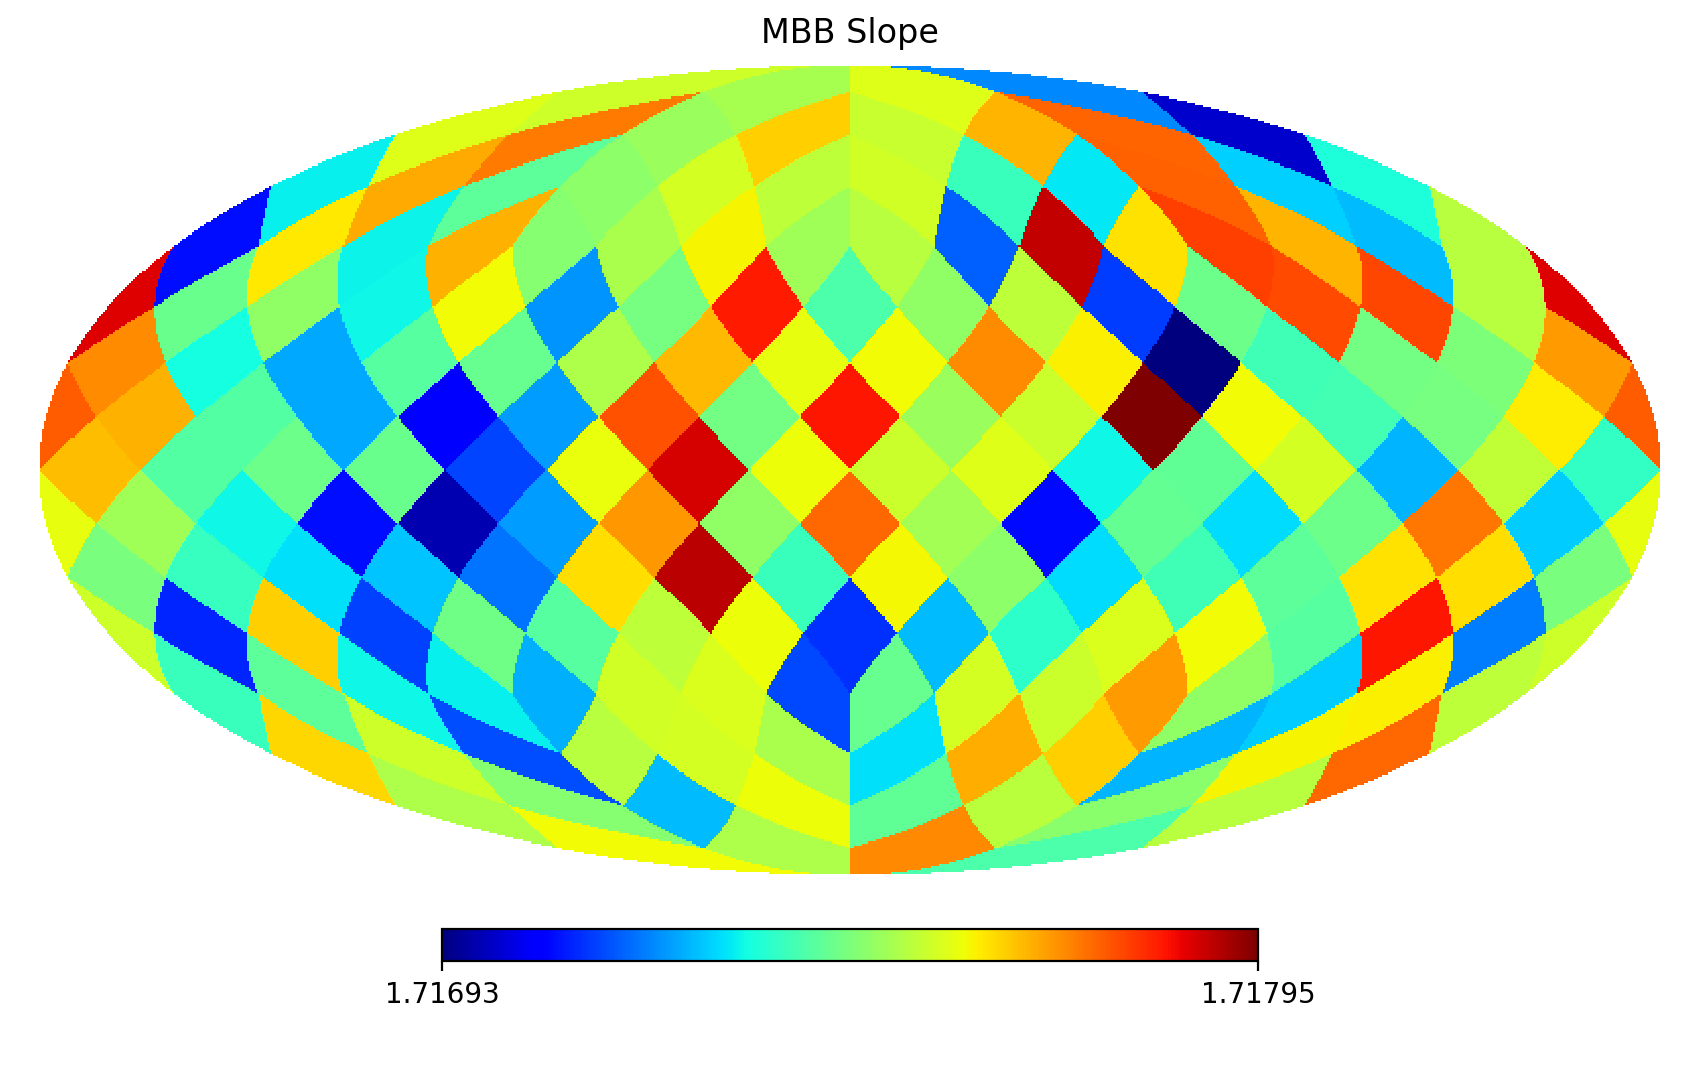

In [122]:
if nside_freq>0:
    h.mollview(T_fit,title="MBB Temperature")
    savefig(figpath + "T_map.pdf",dpi=300)
    
    h.mollview(slope_fit,title="MBB Slope")
    savefig(figpath + "slope_map.pdf",dpi=300)
else:
    print T_fit,slope_fit
    figure()
    plot(nu,mom_fit.moment_expansion_function(nu,*fit_par),"k-",label="Monopole")
    plot(nu,abs(local_monopole[:,0]-mom_fit.moment_expansion_function(nu,*fit_par0)),"--",label="MBB fit")
    plot(nu,abs(local_monopole[:,0]-mom_fit.moment_expansion_function(nu,*fit_par)),"-",label="Moment fit")
    xlabel(r"Frequency $\nu$ [GHz]")
    ylabel(r"$\Delta I_{\nu}$")
    legend(loc=0)
    semilogy()

In [123]:
gs_fit=gsmom.gram_schmidt_fitting(2)
moments=np.zeros((6,h.nside2npix(nside_moments)),float)
for i in range(num_freq_pix):
    T=T_fit[i] ; slope=slope_fit[i]
    gs_fit.gram_schmidt_iterative(nu,T,slope,tol=1e-12)
    if num_freq_pix>1:
        v=h.boundaries(nside_freq,i) ; v=np.swapaxes(v,0,1) 
        child_pixels=h.query_polygon(nside_moments,v)
    else:
        child_pixels=np.arange(h.nside2npix(nside_moments))
    for pix in child_pixels:
        Inu=data[:,pix]
        gs_coeffs=gs_fit.get_basis_coeffs(Inu,2)
        moments[:,pix]=np.array(gs_coeffs)

<IPython.core.display.Javascript object>


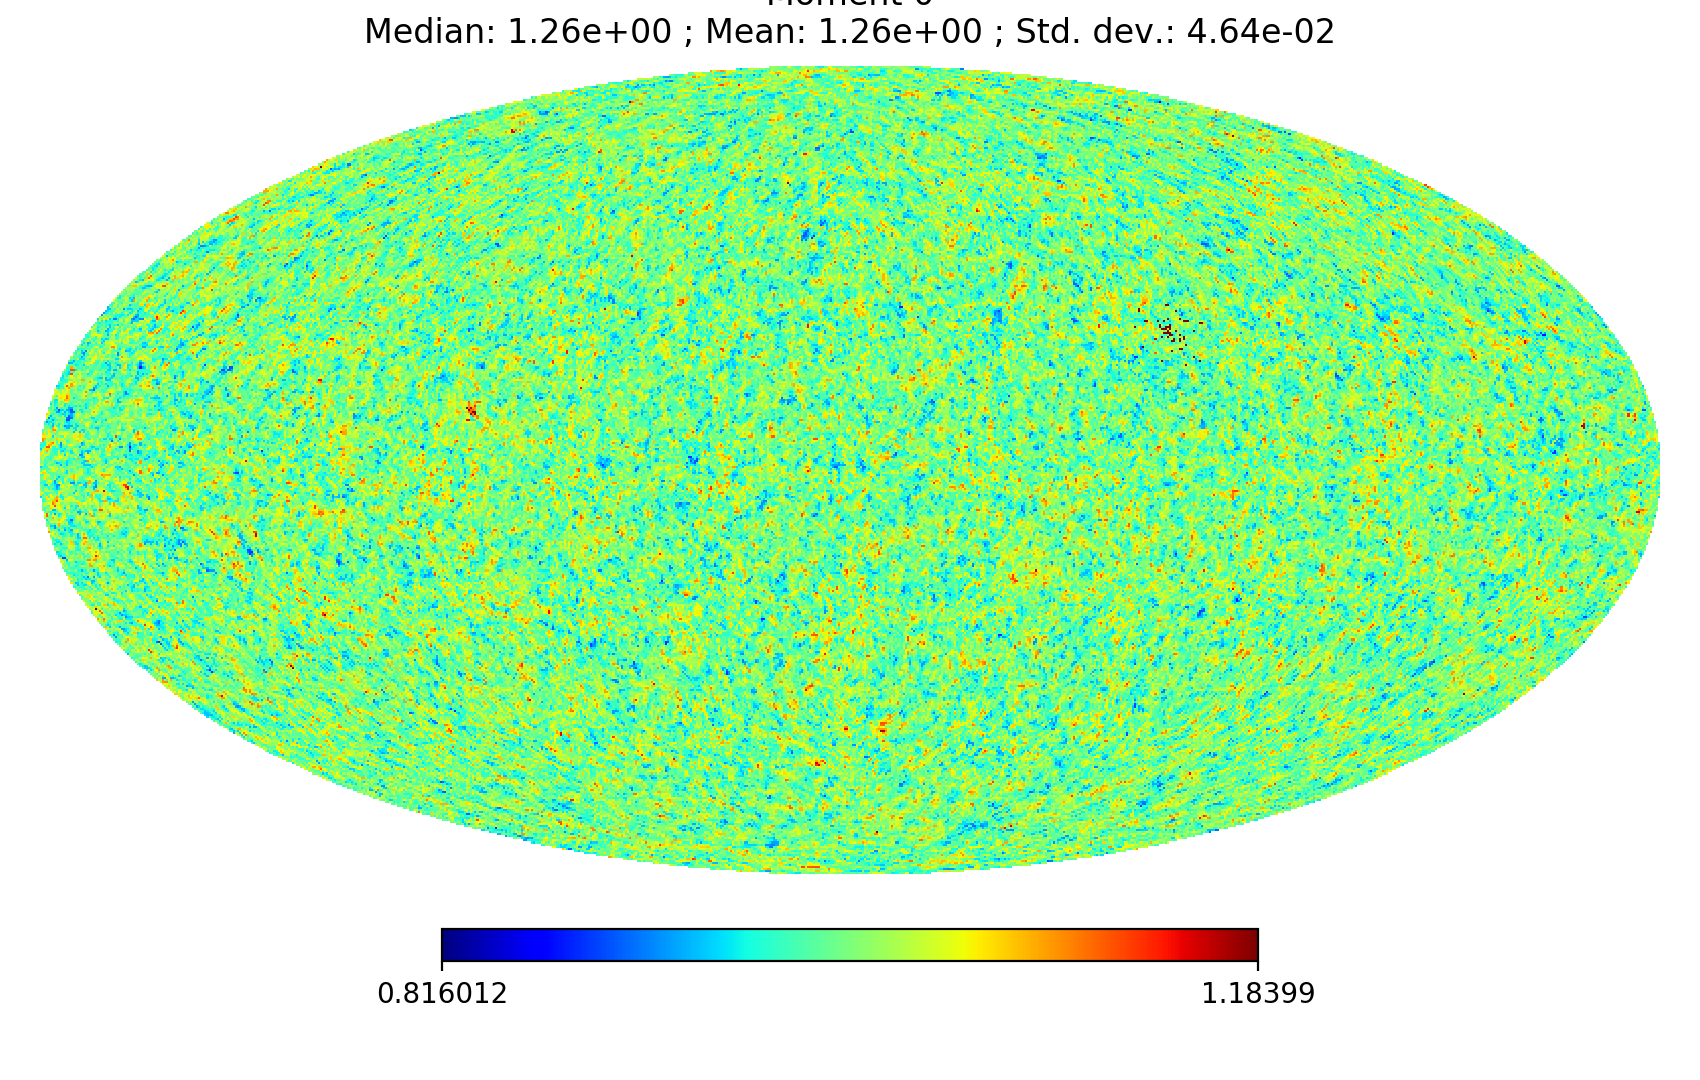

<IPython.core.display.Javascript object>


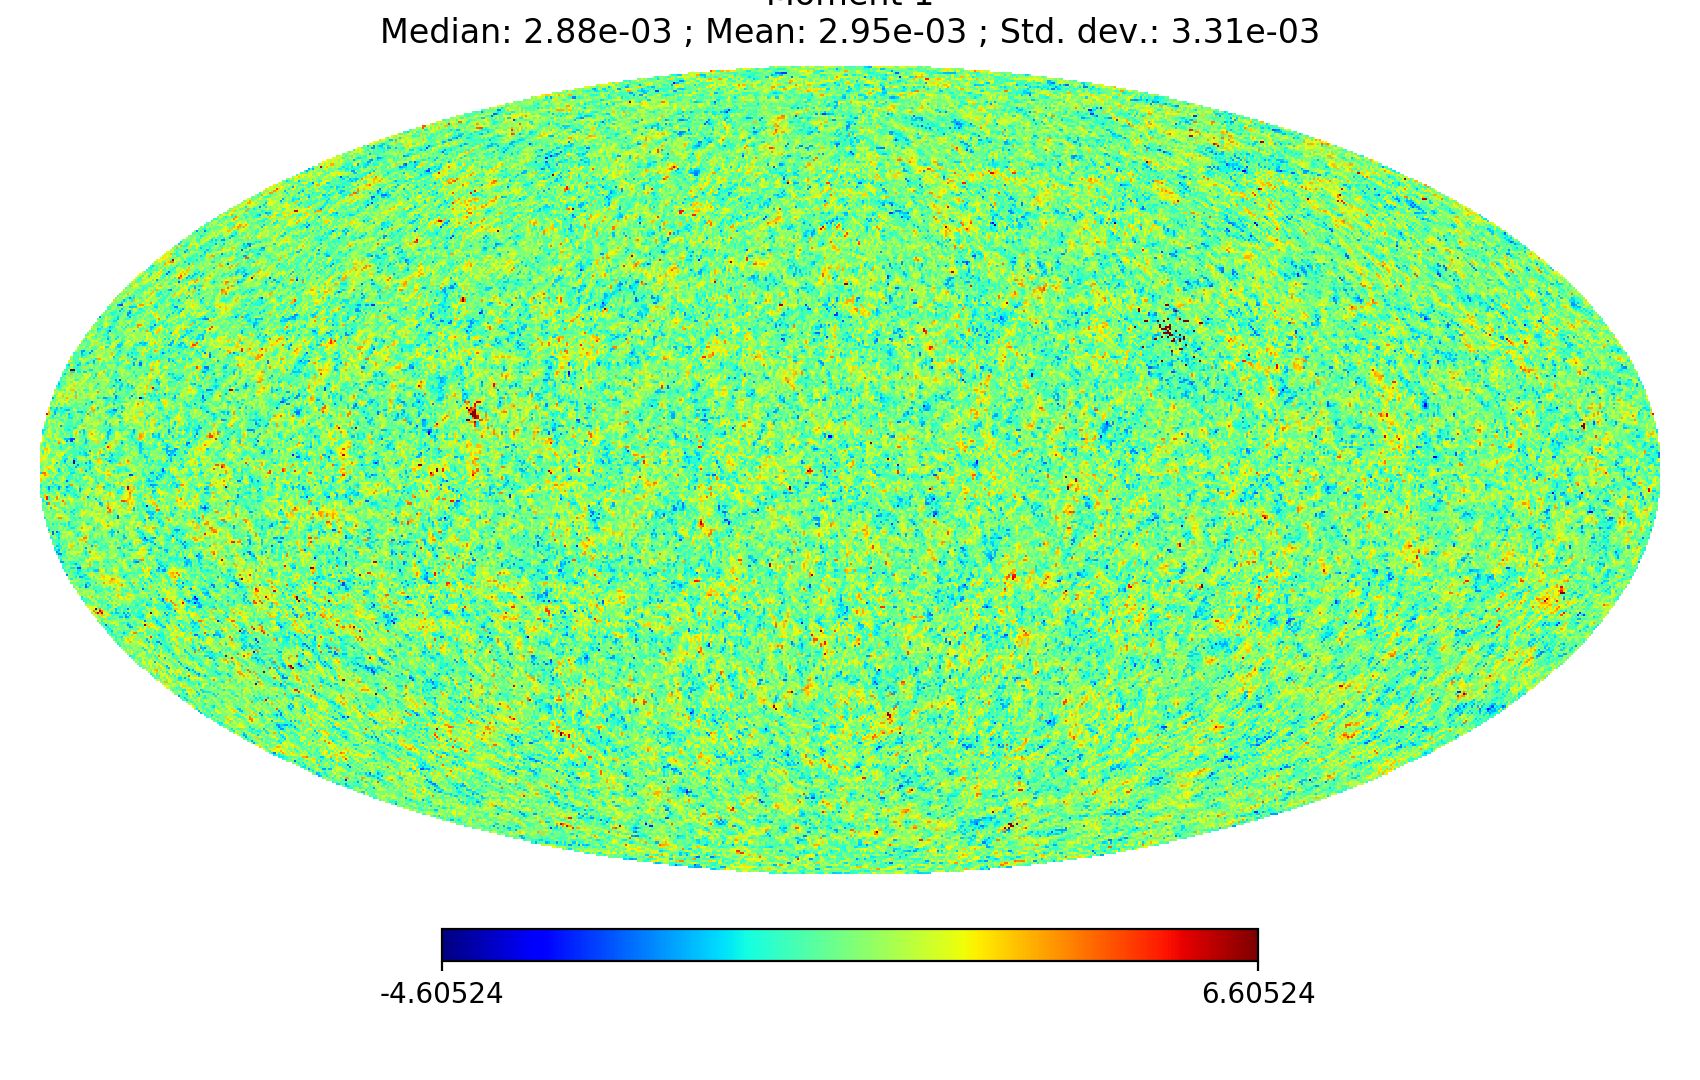

<IPython.core.display.Javascript object>


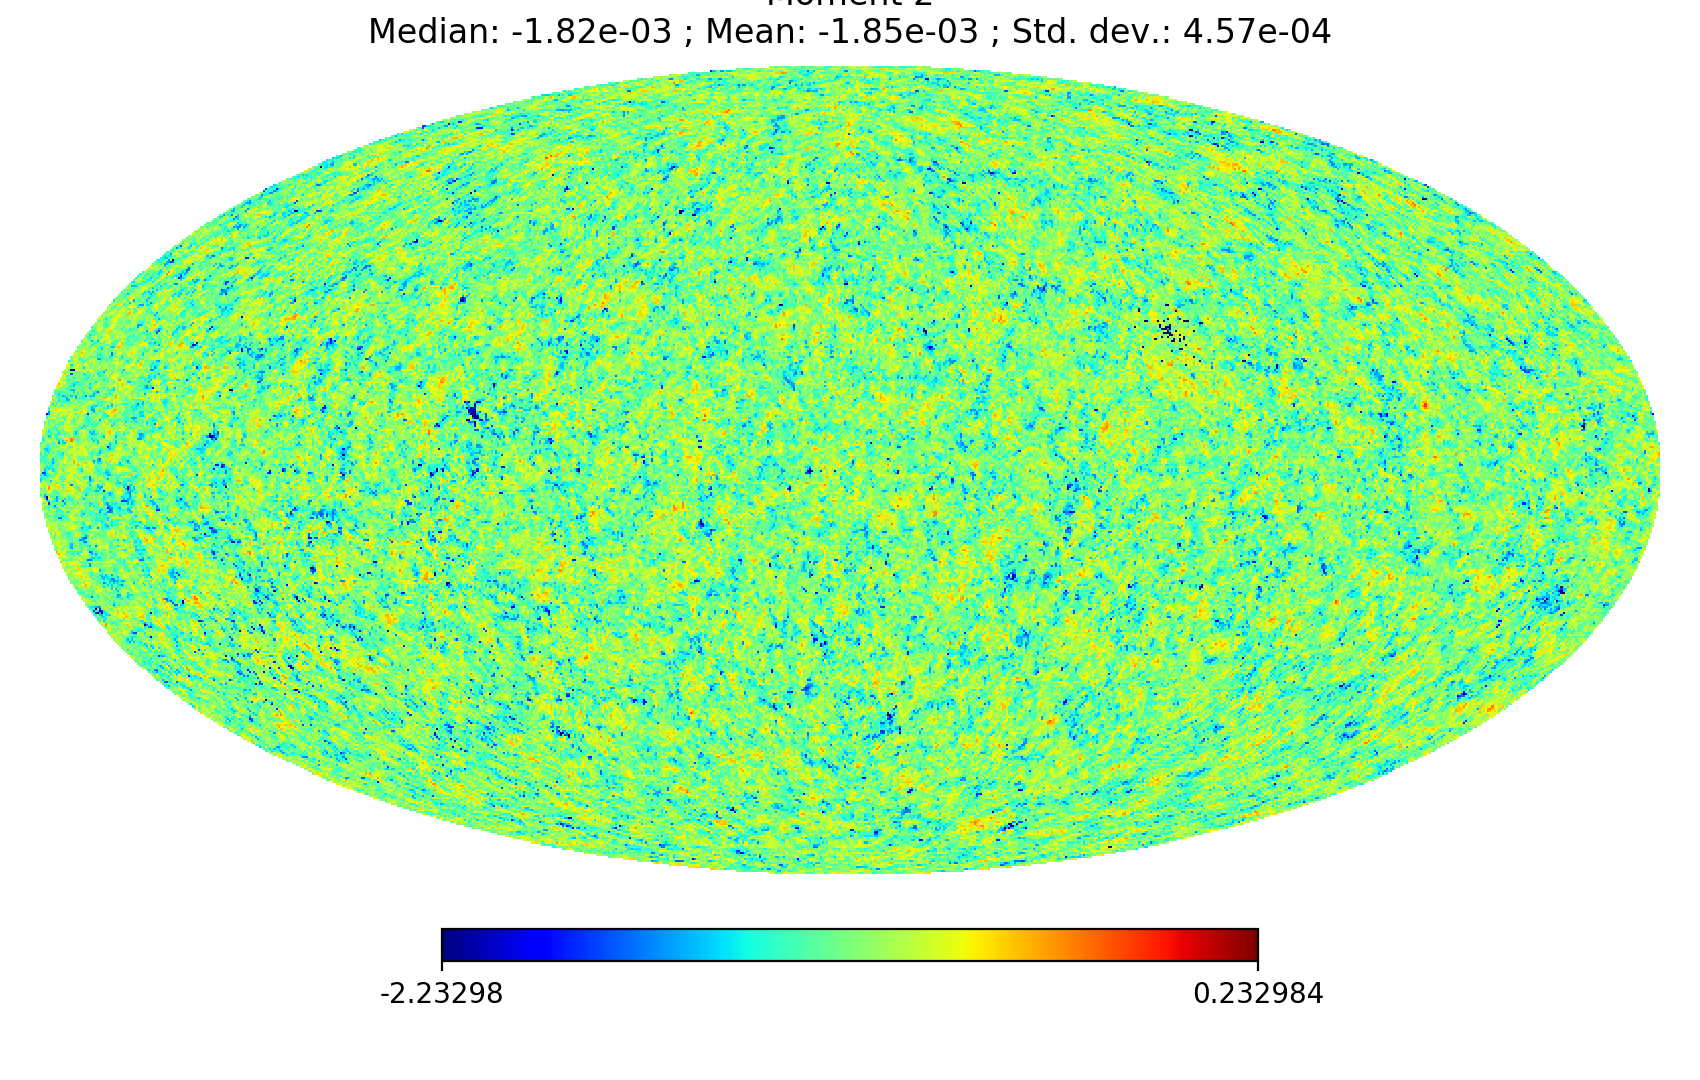

<IPython.core.display.Javascript object>


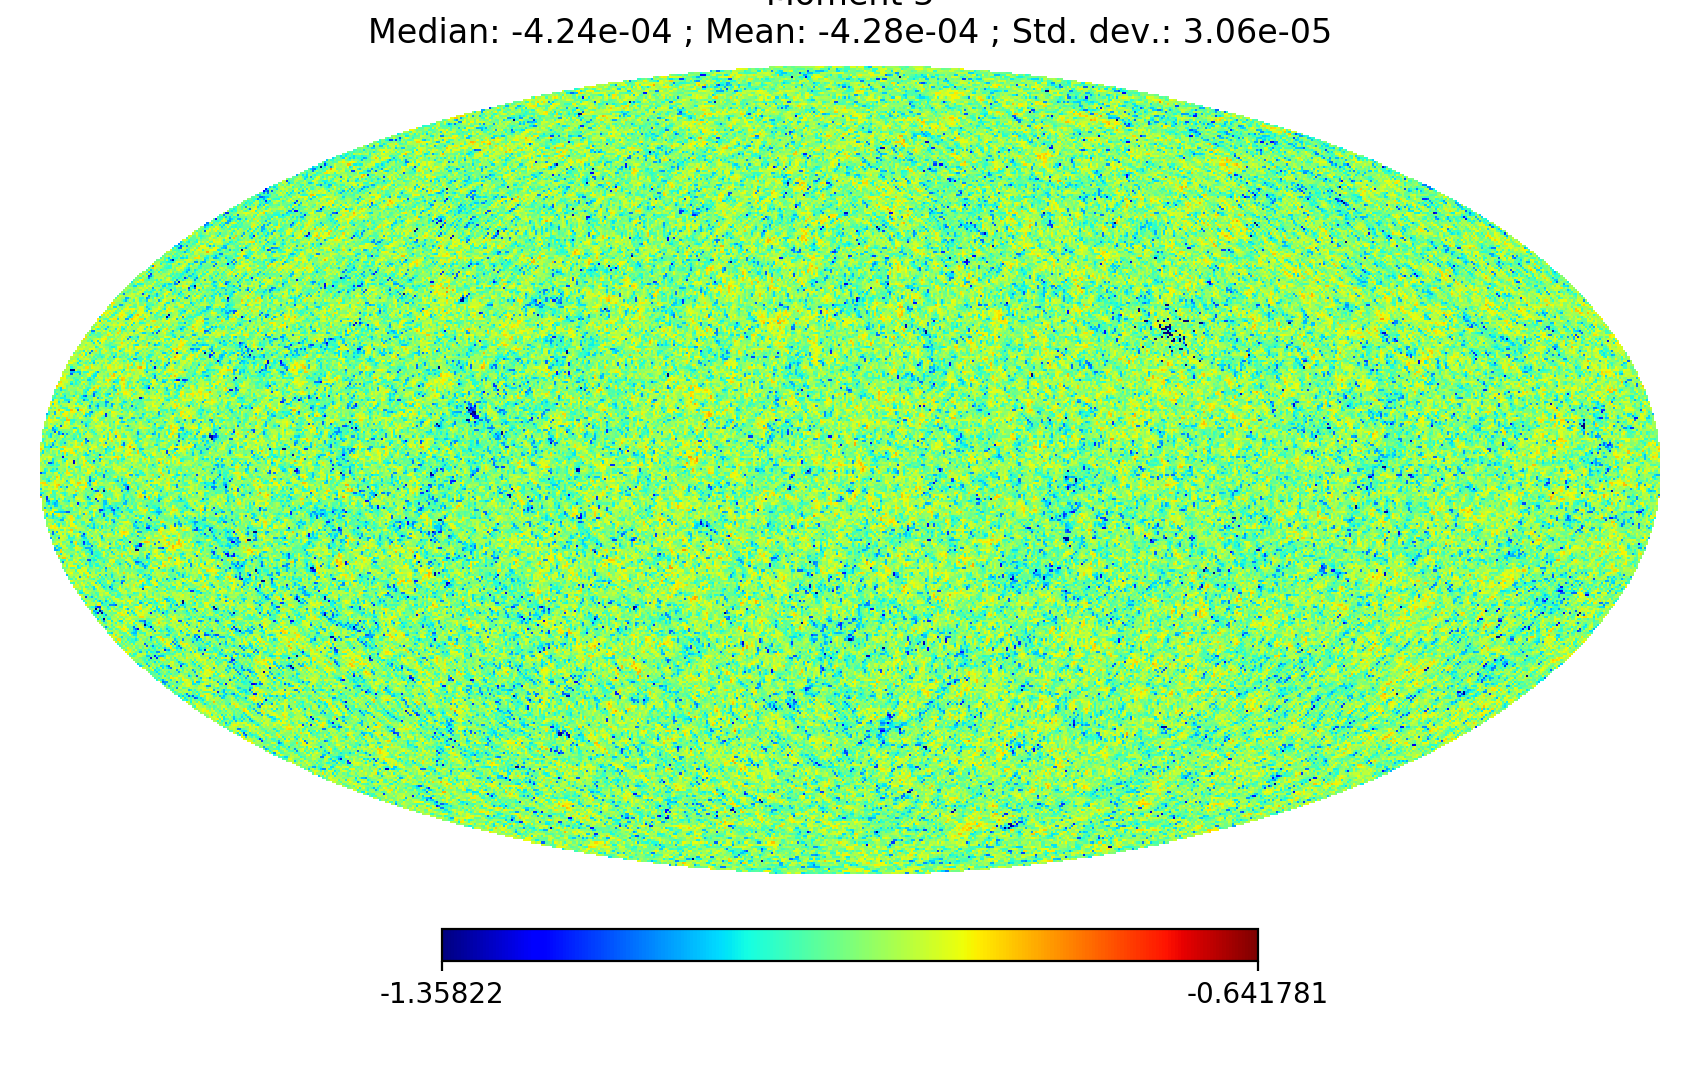

<IPython.core.display.Javascript object>


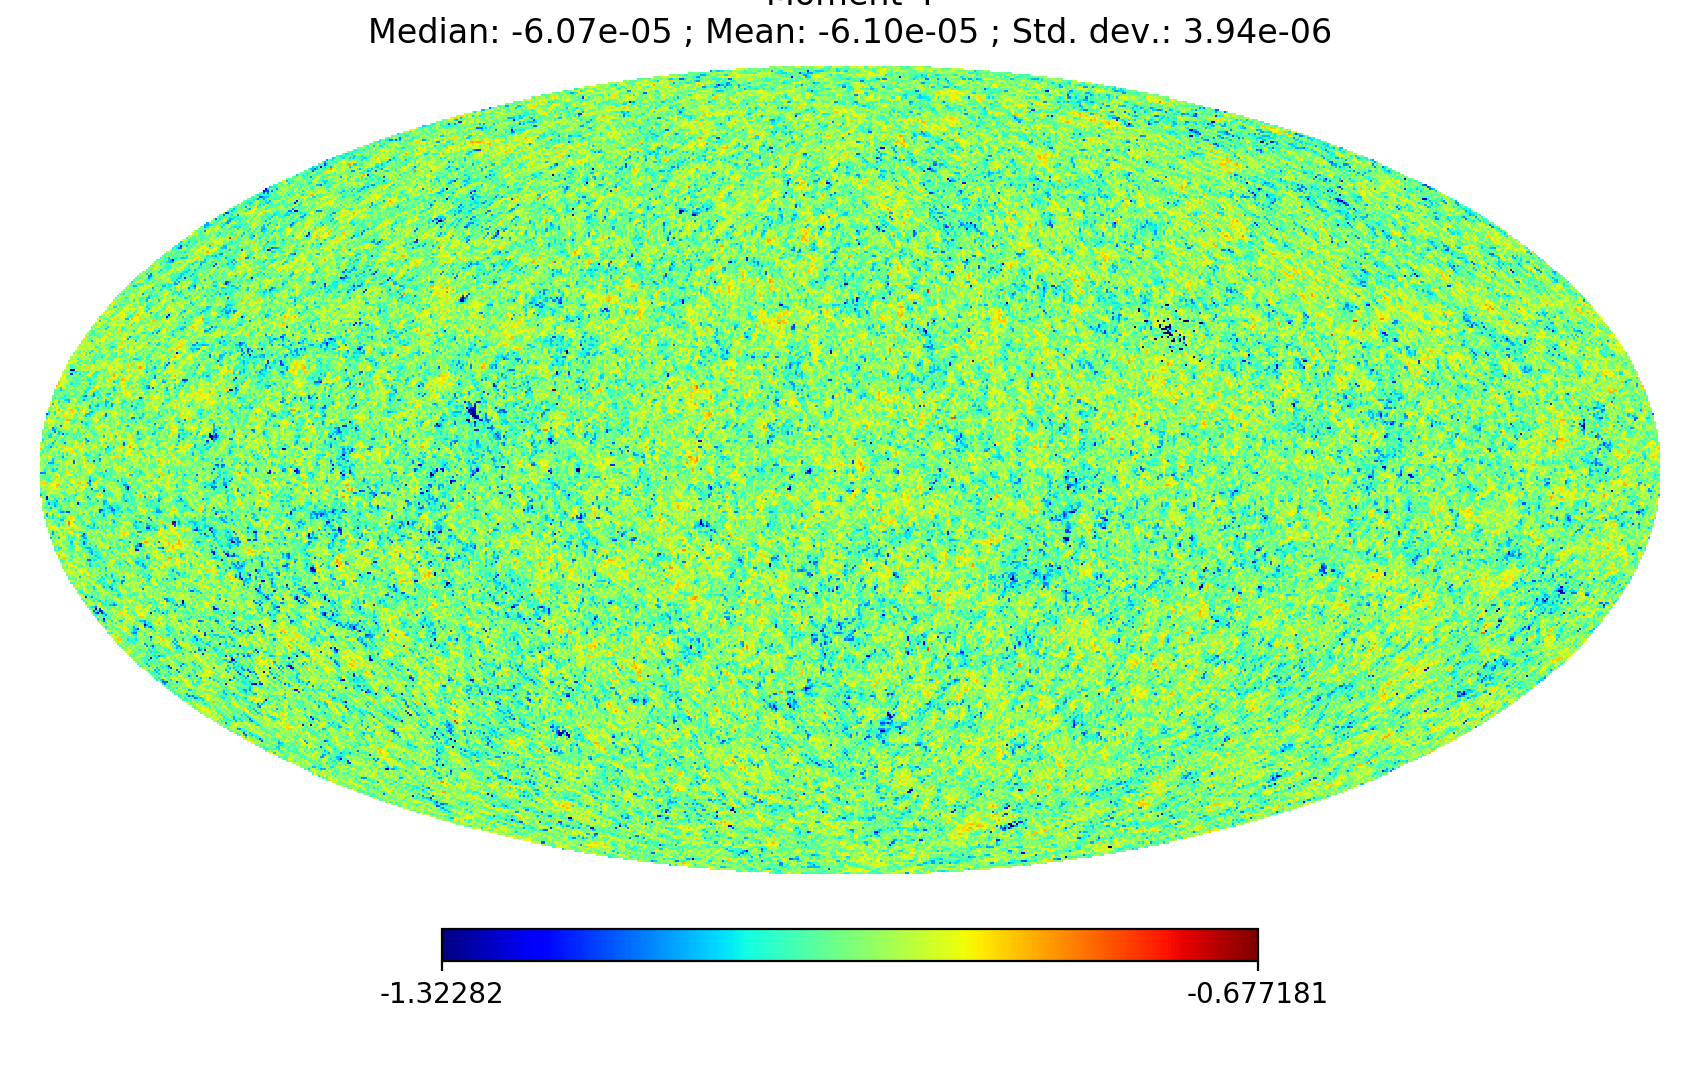

<IPython.core.display.Javascript object>


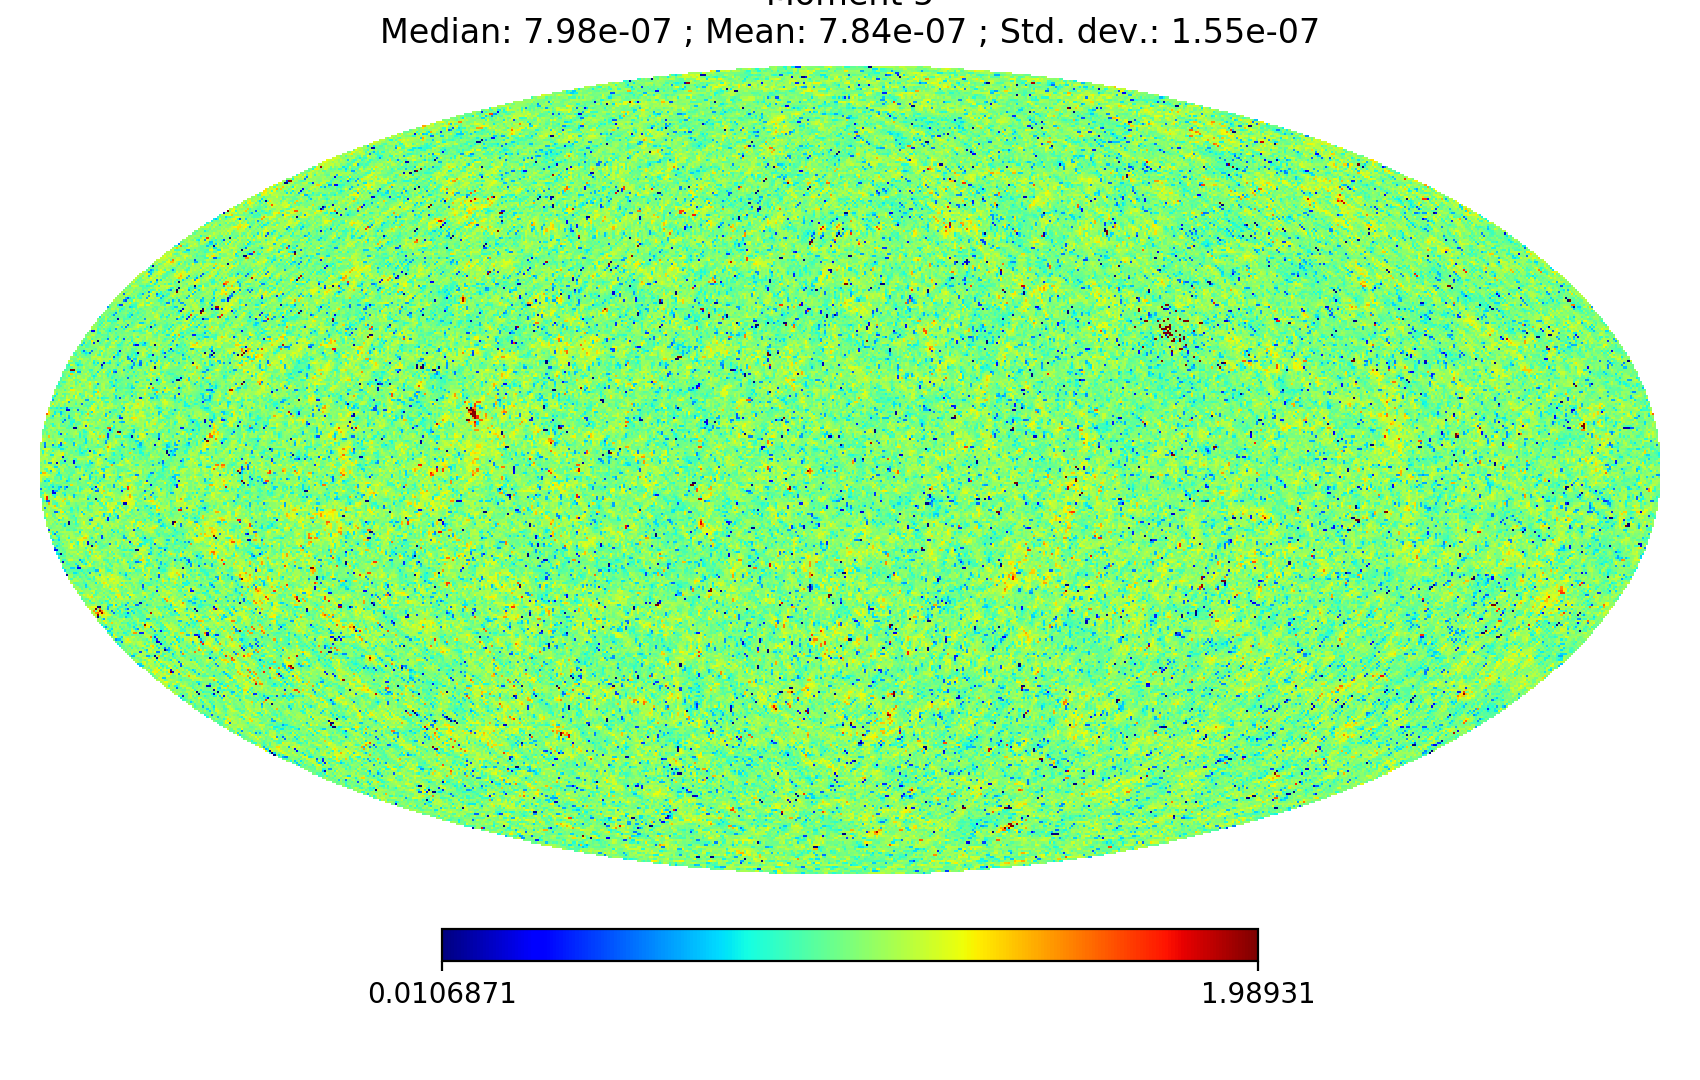

In [143]:
for i in range(6):
    if nside_freq>0:
        label=r"Moment "+ str(i)
    else:
        label="Moment "+ str(i) + " [T=" + str(round(T_fit[0],3)) + r"; $\alpha$=" + str(round(slope_fit[0],3)) + "]"
    temp_map=moments[i,]/abs(np.mean(moments[i,]))
    map_min=np.mean(temp_map)- 5.*np.std(temp_map)
    map_max=np.mean(temp_map)+ 5.*np.std(temp_map)
    label=label + "\n" + "Median: " + str('{:.2e}'.format(np.median(moments[i,]))) 
    label=label + " ; Mean: " + str('{:.2e}'.format(np.mean(moments[i,]))) 
    label=label + " ; Std. dev.: " + str('{:.2e}'.format(np.std(moments[i,])))
    h.mollview(temp_map,min=map_min,max=map_max,title=label)
    filename=figpath + "moment_" + str(i) + ".pdf"
    savefig(filename,dpi=150,bbox_inches="tight")

# Reconstruct data

<IPython.core.display.Javascript object>


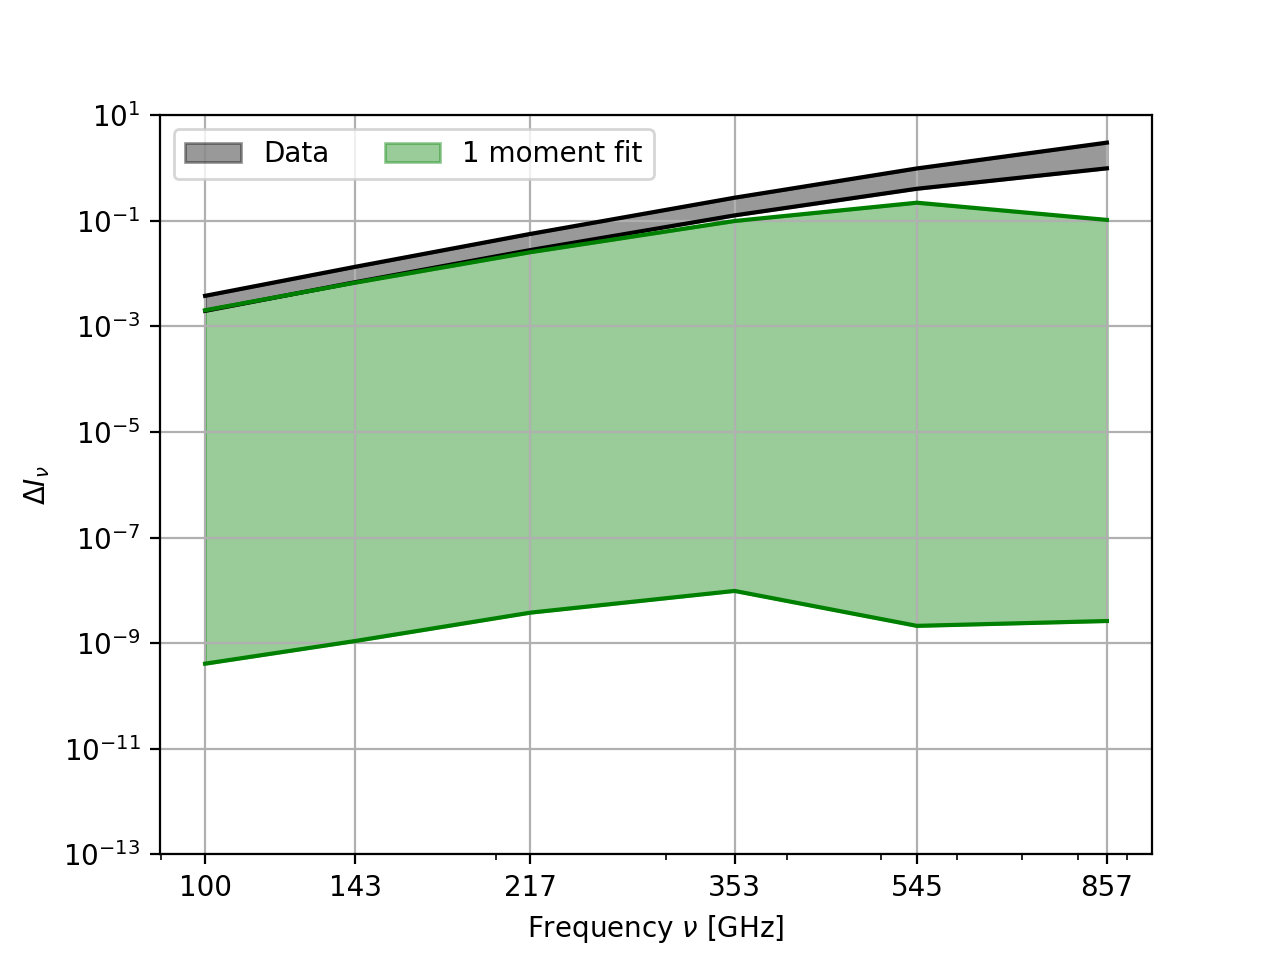

<IPython.core.display.Javascript object>


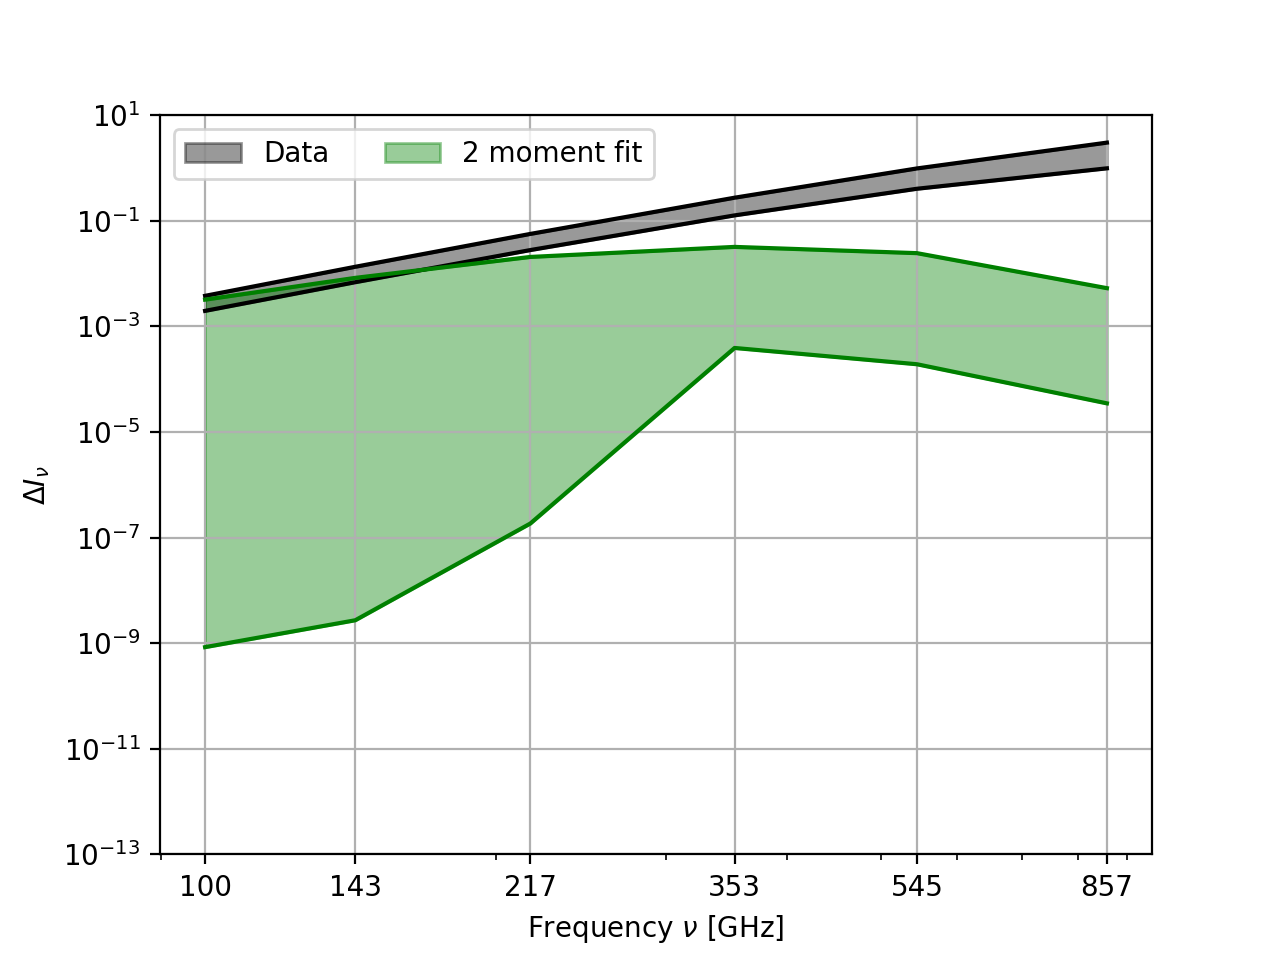

<IPython.core.display.Javascript object>


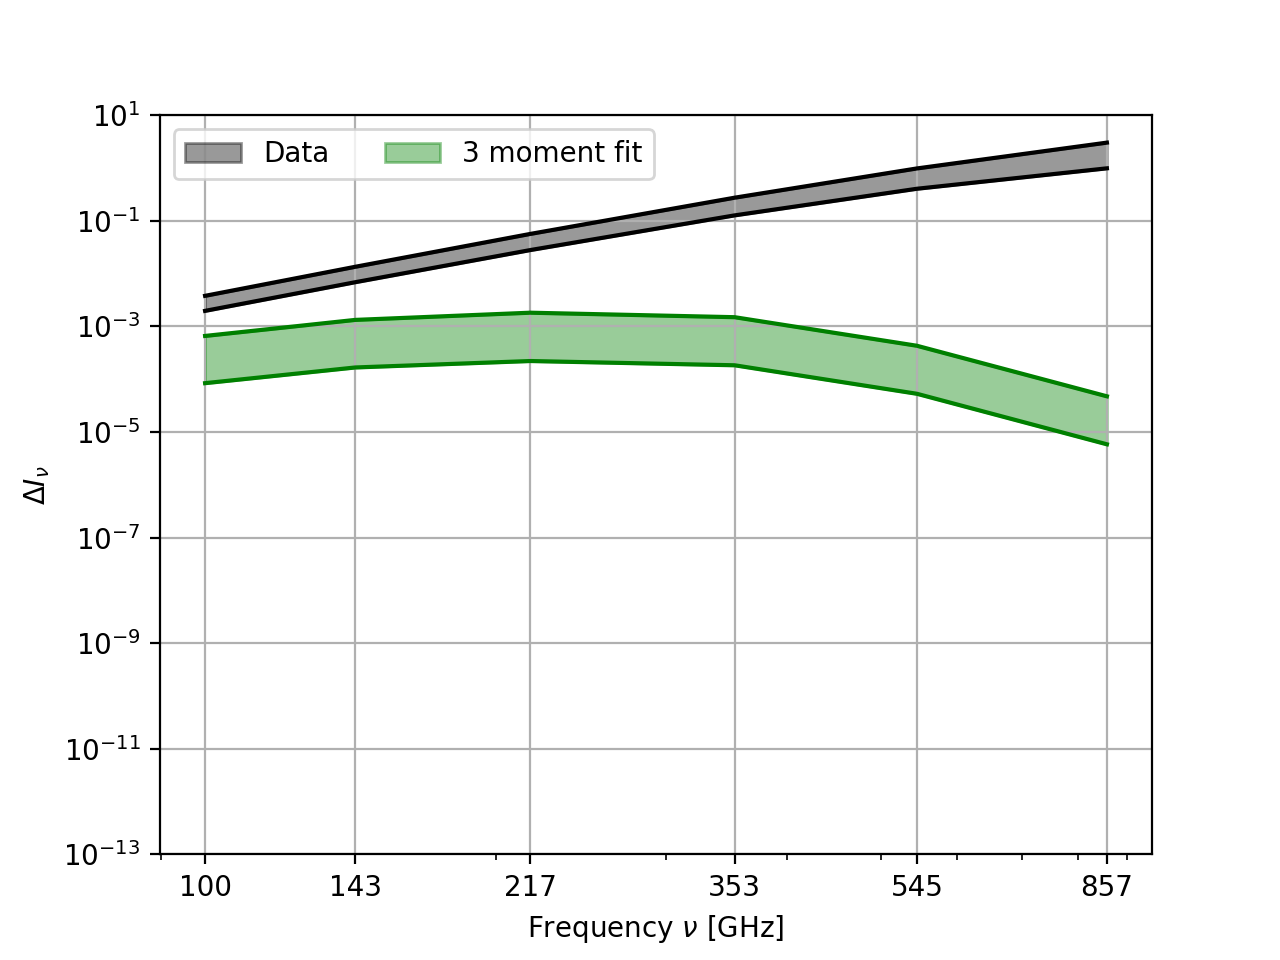

<IPython.core.display.Javascript object>


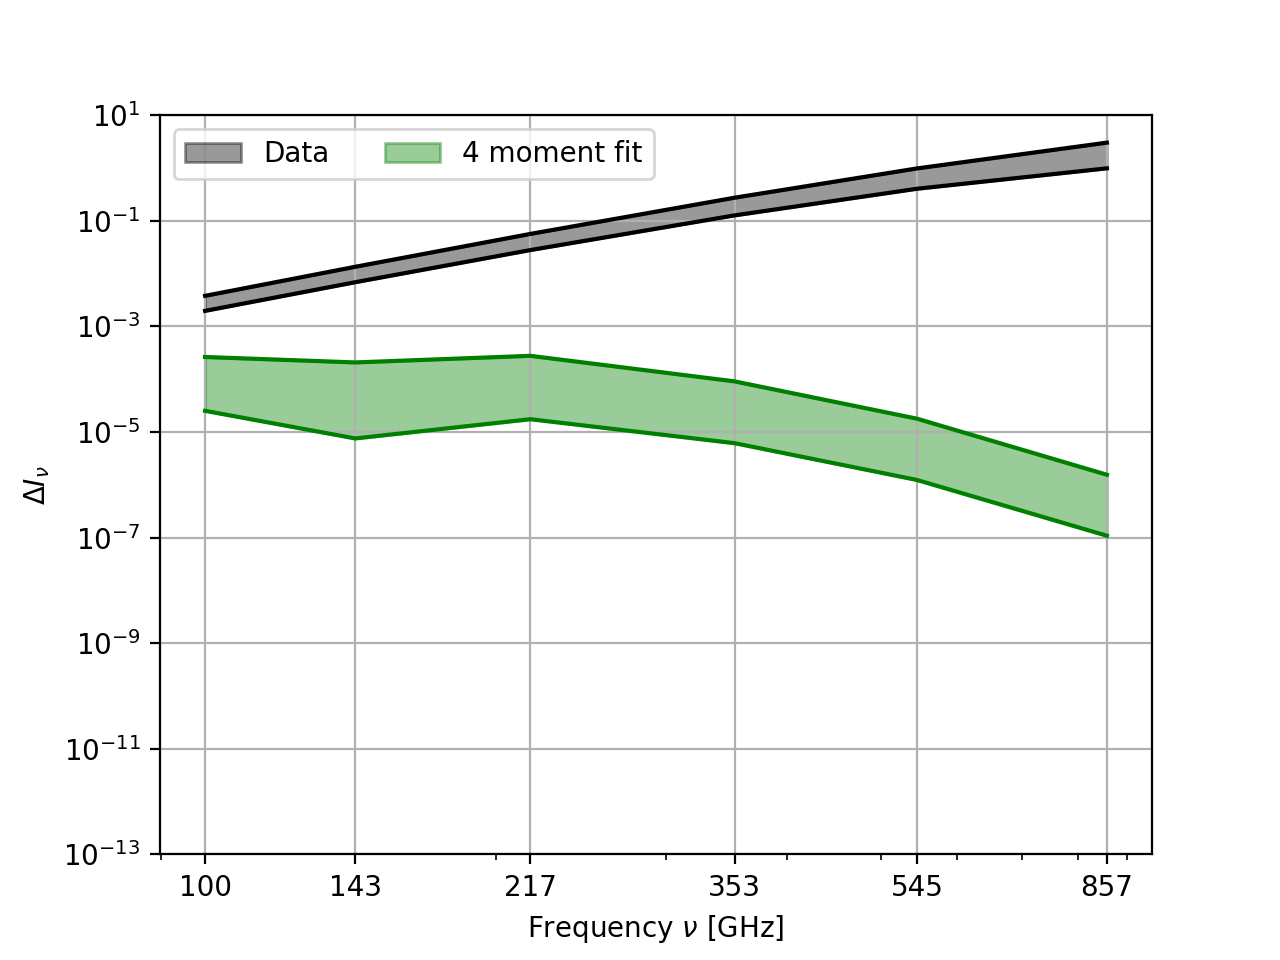

<IPython.core.display.Javascript object>


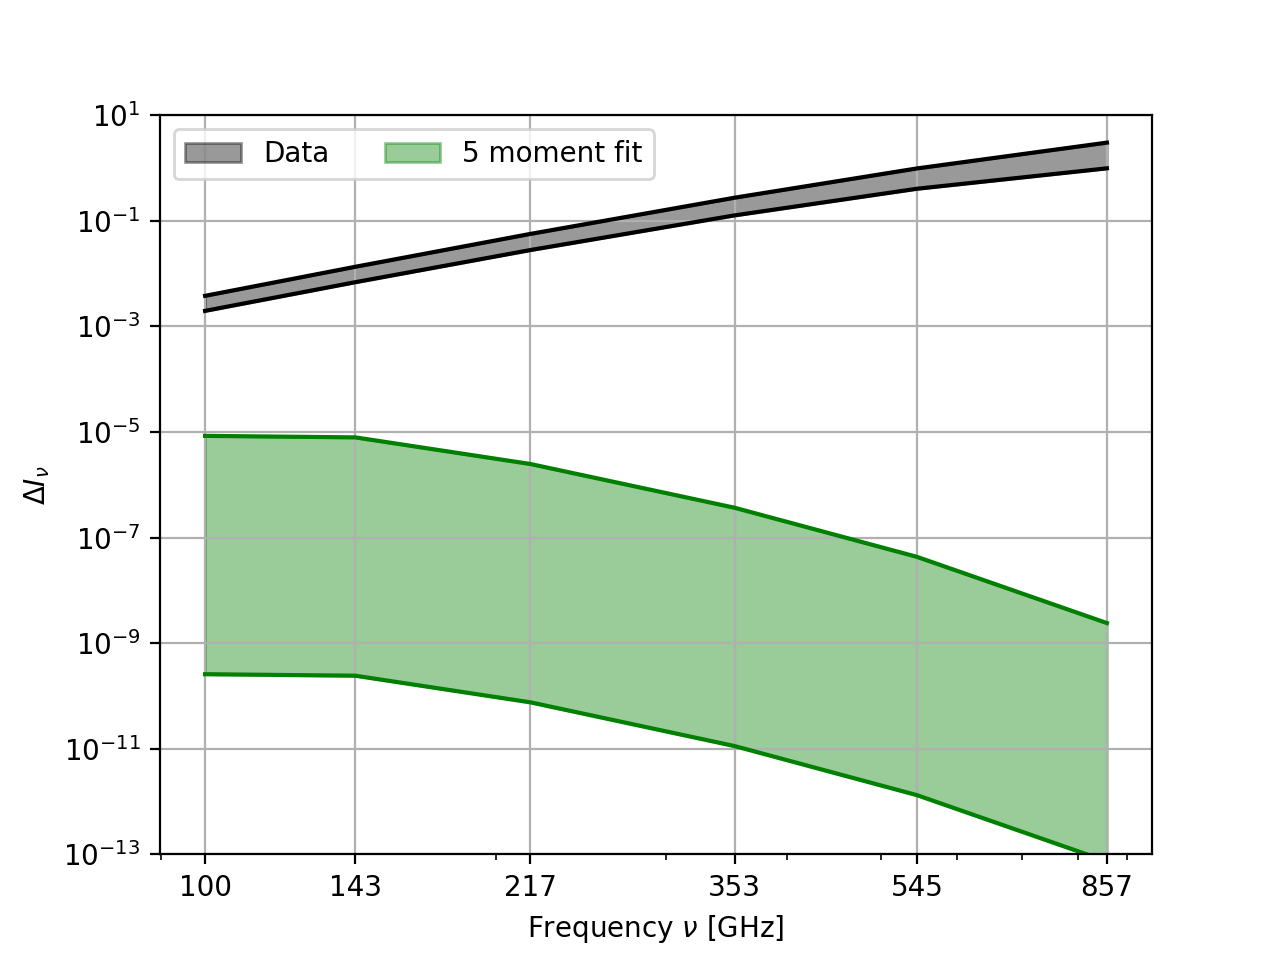

<IPython.core.display.Javascript object>


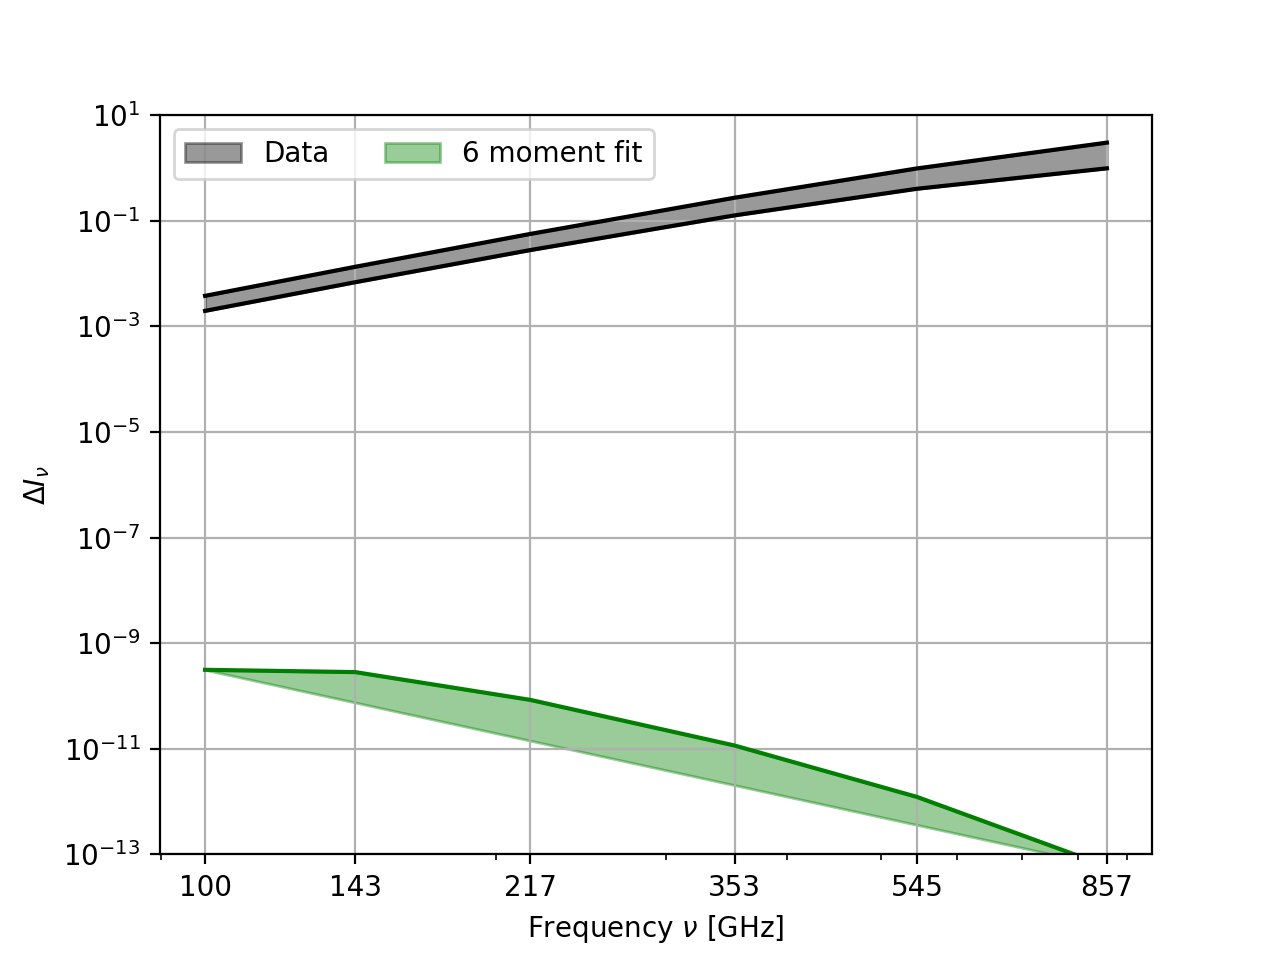

In [145]:
for k in range(6):
    num_moments=k+1
    rec_data=np.zeros((np.size(nu),num_moment_pix),float)
    for i in range(num_freq_pix):
        T=T_fit[i] ; slope=slope_fit[i]
        gs_fit.gram_schmidt_iterative(nu,T,slope,tol=1e-12)
        if num_freq_pix>1:
            v=h.boundaries(nside_freq,i) ; v=np.swapaxes(v,0,1) 
            child_pixels=h.query_polygon(nside_moments,v)
        else:
            child_pixels=np.arange(h.nside2npix(nside_moments))

        for pix in child_pixels:
            par=moments[:num_moments,pix]
            rec_data[:,pix]=gs_fit.reconstruct_sed(*par)
            
    color=["r","b","g","m","c","y"]
   
    figure()
    diff_max=[]
    [diff_max.append(max(data[i,:])) for i in range(6)]
    diff_min=[]
    [diff_min.append(min(data[i,:])) for i in range(6)]
    fill_between(nu,diff_max,diff_min,color="k",alpha=0.4,label="Data")
    plot(nu,diff_max,color="k")
    plot(nu,diff_min,color="k")
    
    diff_max=[]
    [diff_max.append(max(abs(rec_data[j,:]-data[j,:]))) for j in range(6)]
    diff_min=[]
    [diff_min.append(min(abs(rec_data[j,:]-data[j,:]))) for j in range(6)]
    fill_between(nu,diff_min,diff_max,color=color[2],alpha=0.4,label=str(num_moments) + " moment fit")
    plot(nu,diff_max,color=color[2])
    plot(nu,diff_min,color=color[2])

    loglog()  
    grid()
    xlabel(r"Frequency $\nu$ [GHz]")
    ylabel(r"$\Delta I_{\nu}$")
    xticks(freq,freq)
    ylim(1e-13,1e1) ; legend(loc=0,ncol=2)
    filename=figpath+ "fit" + "_moments_" +  str(num_moments) + ".pdf"        
    savefig(filename,dpi=150)

<IPython.core.display.Javascript object>


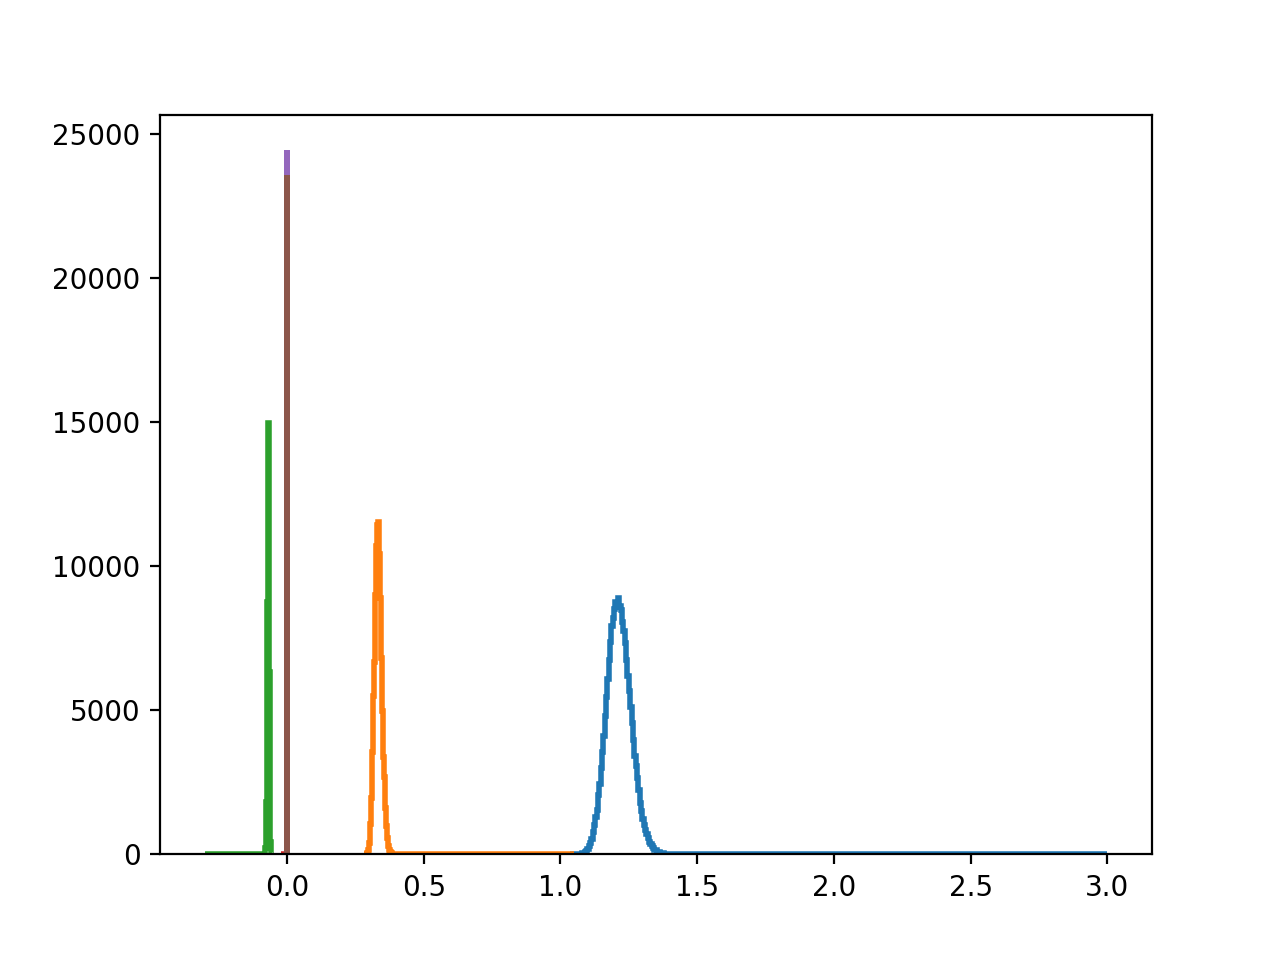

<IPython.core.display.Javascript object>


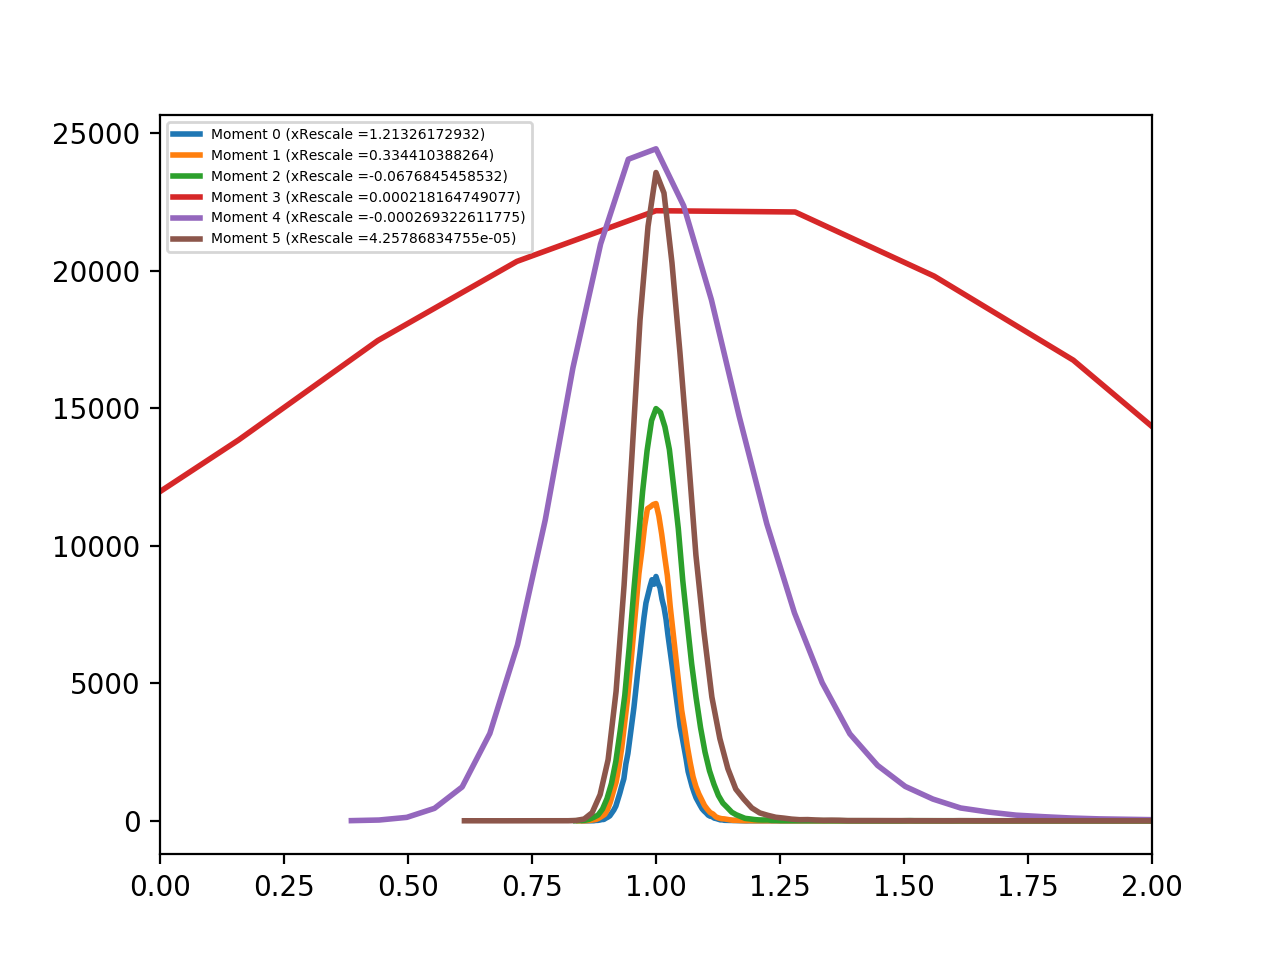

In [117]:
x={}
y={}
figure()
for i in range(6):
    temp=hist(moments[i,:],bins=400,histtype="step",linewidth=2)
    x[i]=(temp[1][1:]+temp[1][:-1])/2.
    y[i]=temp[0]
    
figure()
for i in range(6):
    norm=x[i][y[i]==max(y[i])]
    plot(x[i]/norm,y[i],label="Moment " + str(i) + " (xRescale =" + str(norm[0]) + ")",lw=2)
xlim(0,2)
legend(loc=0,fontsize=5)
savefig(figpath + "moment_histogram.pdf",dpi=150)

<IPython.core.display.Javascript object>


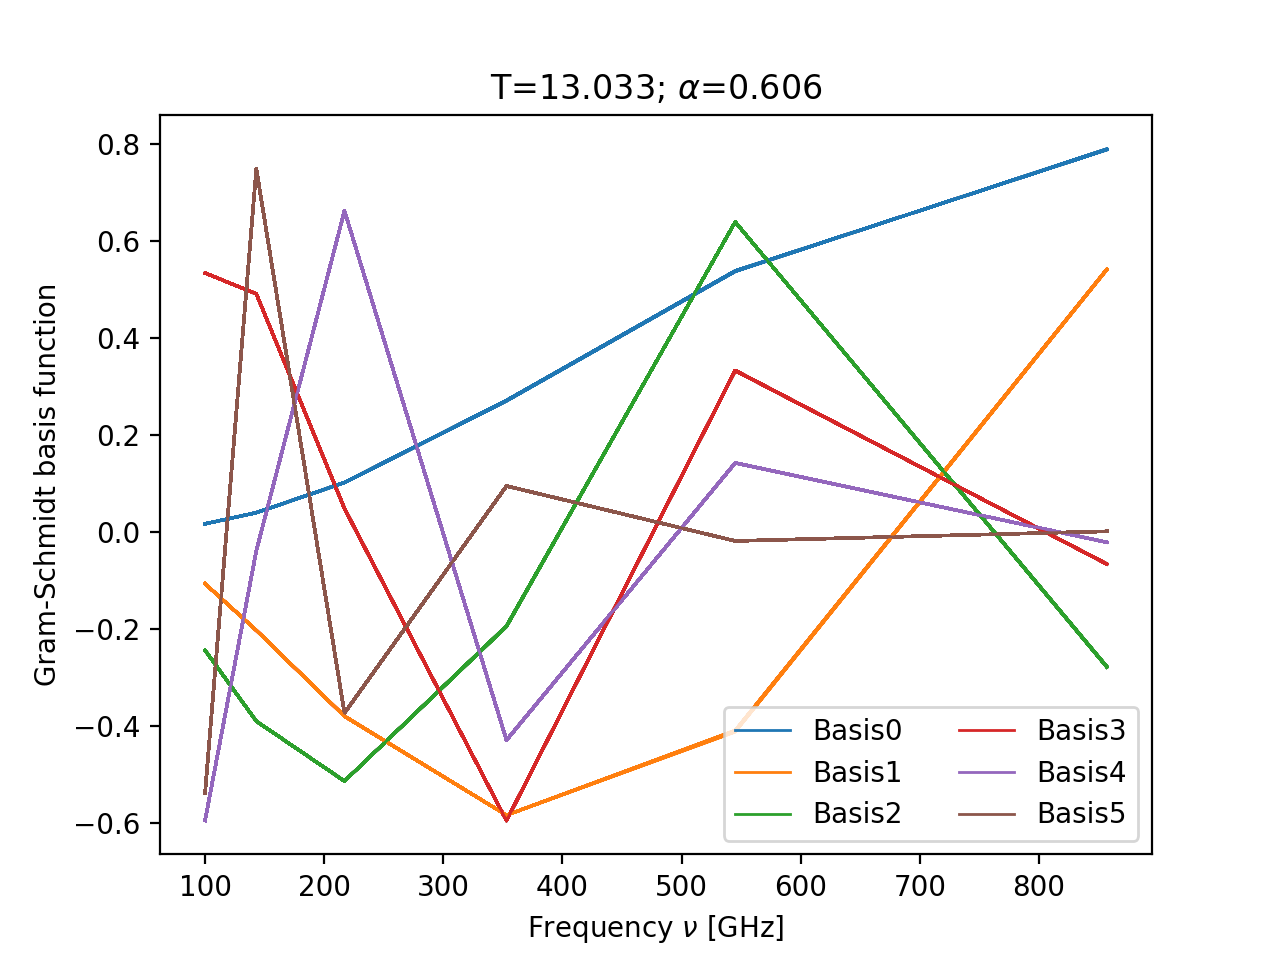

In [119]:
figure()
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']
for i in range(num_freq_pix):
    T=T_fit[i] ; slope=slope_fit[i]
    #print T,slope
    gs_fit.gram_schmidt_iterative(nu,T,slope,tol=1e-12)
    for j in range(6):
        if i==0:
            plot(nu,gs_fit.basis[j],lw=1,c=color[j],label="Basis" + str(j))
        else:
            plot(nu,gs_fit.basis[j],lw=1,c=color[j])
title("T=" + str(round(np.mean(T_fit),3)) + r"; $\alpha$=" + str(round(np.mean(slope_fit[0]),3)))
xlabel(r"Frequency $\nu$ [GHz]")
ylabel("Gram-Schmidt basis function")
legend(loc=0,ncol=2)
savefig(figpath + "gs_basis.pdf",dpi=150)